# Normal Linear Regression

# Statistical Inference Example #1

<hr>

### Imports

In [1]:
import numpy as np

## Randomly Generating Data

In [2]:
N = 1000

mean_height = 68
std_height = 3

w0 = -290
w1 = 6.66
std_weight = 10

# Our Model:
# mean_weight = w0 + (w1 * height)


heights = np.array(
    [np.random.normal(loc=mean_height, scale=std_height) for i in range(N)])

weights = np.array(
    [np.random.normal(loc=(w0+(w1*height)), scale=std_weight) for height in heights])

# Compact approach to heights that is less general:
# heights = np.random.normal(loc=mean_height, scale=std_height, size=N)

# Functional approach to generating the weights:
# def mean_weight(height):
#     return w0 + (w1 * height)
# def sample_weight(height):
#     return np.random.normal(loc=mean_weight(height), scale=std_weight)
# weights = np.array(
#     [sample_weight(height) for height in heights])

print(heights[:10])
print(weights[:10])

[69.66362252 70.31892476 66.1258838  66.88573366 65.54447373 63.00642504
 70.65867602 64.46085681 68.36349734 67.14871716]
[161.61293936 164.45058364 142.57551185 170.73956117 155.89849402
 116.1245501  182.11647924 112.22431658 169.34805217 162.48054974]


In [3]:
from matplotlib import pyplot as plt

plt.scatter(heights, weights)

## Statistical Inference

Because we randomly generated the data, we know the true values of the parameters of the model, namely:

* $w_0 = -290$
* $w_1 = 6.66$
* std_weight $= 10$

Now we are going to pretend that we do not know these values.  How would we figure them out, if someone handed us these heights and weights?  We will create a function to **score** candidate parameters.  It will be an error function, so **lower scores will be better**.  We will call it **$f$**.

Below we choose some candidate parameters and demonstrate the predictions they would lead to.  When we create our scoring function, these candidates will hopefully have a worse score than the true parameters.

In [4]:
# Given (w0, w1, sigma) ----> Score
# Sum (Average) of squares of residuals r_i = (y_i - y_pred_i)

# True Parameters:
# w0 = -290
# w1 = 6.66
# std_weight = 10

# Candidate Parameters
b0 = -280
b1 = 7
std_y = 9

x = heights
y = weights

y_pred = (b0 + b1*x)[:10]
y_pred

array([207.64535762, 212.23247329, 182.8811866 , 188.20013565,
       178.81131614, 161.04497528, 214.61073212, 171.22599766,
       198.5444814 , 190.04102009])

In [5]:
y[:10]

array([161.61293936, 164.45058364, 142.57551185, 170.73956117,
       155.89849402, 116.1245501 , 182.11647924, 112.22431658,
       169.34805217, 162.48054974])

In [6]:
def f(b0, b1):
    y_pred = b0 + b1*x
    r = y - y_pred
    return np.mean(r ** 2)

In [7]:
print('Score (Error) of Candidate Parameters:', f(b0, b1))
print('Score (Error) of True Parameters:', f(w0, w1))

Score (Error) of Candidate Parameters: 1228.286075457154
Score (Error) of True Parameters: 101.80887678920448


Wonderful!  Our true parameters beat out candidate parameters.  Can we see more generally that our true parameters score among the best of all choices?  For the sake of visualization let's hold one parameters still and vary the other.

First we will hold $w_1$ fixed, and try many choices for $w_0$ computing our $f$ function to score them.

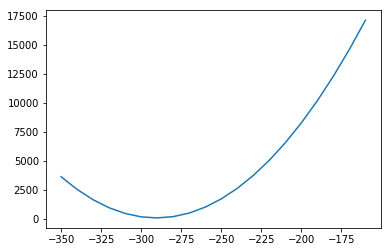

In [8]:
plot_x = np.arange(-350, -150, 10)
plot_y = np.array(
    [f(w0_trial, w1) for w0_trial in plot_x]
)

plt.plot(plot_x, plot_y)

In [9]:
plot_x[np.argmin(plot_y)]

-290

Below we have essentially the same code, but written in a way that might be more friendly in R.  We use our function multi-variable function $f$ to create a single variable function $g$ (or $h$) and apply that function to `plot_x`.

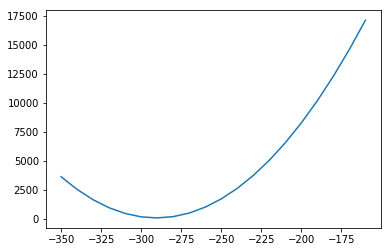

In [10]:
def g(b0):
    return f(b0, w1)

h = lambda b0: f(b0, w1)

plot_x = np.arange(-350, -150, 10)
plot_y = np.array(
    [h(w0_trial) for w0_trial in plot_x]
)

plt.plot(plot_x, plot_y)

Now we

Now we will hold $w_1$ fixed, and try many choices for $w_0$ computing our $f$ function to score them.

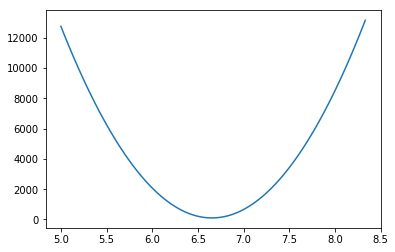

In [11]:
plot_x = np.arange(15/3, 25/3, 1/30)
plot_y = np.array(
    [f(w0, w1_trial) for w1_trial in plot_x]
)

plt.plot(plot_x, plot_y)

In [12]:
plot_x[np.argmin(plot_y)]

6.666666666666661

Lastly we will use optimization software in the `scipy` library to actually minimize out two-variable function, and see how close our "optimal" parameters (Maximum Likelihood Estimates) are to the true parameters we used to generate the data.

In [13]:
from scipy.optimize import minimize

def f_array(arr):
    b0, b1 = arr
    y_pred = b0 + b1*x
    r = y - y_pred
    return np.mean(r ** 2)

In [14]:
initial_guess = np.array([b0, b1])
minimize(f_array, initial_guess)

      fun: 101.58245493740864
 hess_inv: array([[ 2.60268906e+02, -3.82142021e+00],
       [-3.82142021e+00,  5.62163219e-02]])
      jac: array([9.53674316e-07, 4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([-285.89844294,    6.59330338])